In [12]:
#Common Libraries
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#Libraries for machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [14]:
#Uloading the data
glass=pd.read_csv("glassClass.csv")

In [15]:
#The setup
X= glass.drop("Type", axis=1) #predictors
Y = glass["Type"] #response 

In [16]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state=25) #20% hold out for testing

In [17]:
# instantiate learning model (k = 2)
knn = KNeighborsClassifier(n_neighbors=2)

In [18]:
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
# making predictions
Y_pred = knn.predict(X_test)

In [20]:
#Creaitng the confusion matrix
confusion_matrix = confusion_matrix(y_test, Y_pred)
confusion_matrix

array([[15,  1,  0,  0,  0,  0],
       [ 8, 15,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  0,  7]])

In [21]:
#The model is 74% accurate
print accuracy_score(y_test, Y_pred)

0.7407407407407407


In [24]:
#Creating a list for KNN
myList = list(range(1,50))

#this will hold the cv scores
cv_scores = []

#perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


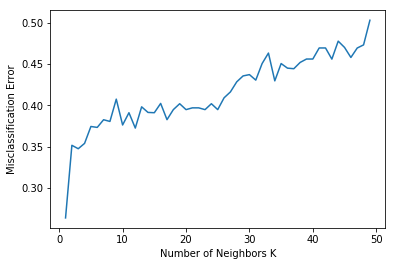

In [26]:
#changing to misclassification error
MSE = [1 - x for x in cv_scores]

#determining the best k value
optimal_k = myList[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

#Now plotting the misclassification vs k
#The graph knn  should be 1
plt.plot(myList, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()